<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/US_GM_crops_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the GM production dataset

In [2]:
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [4]:
US_gm_crops = pd.read_csv('/content/sample_data/alltablesGEcrops.csv')
US_gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


Cleaning the data, getting rid of asterisks and full stops

In [35]:
US_gm_crops=US_gm_crops.drop(columns='Table')

In [6]:
US_gm_crops["Value"].replace({".": "0"}, inplace=True)

In [8]:
US_gm_crops["Value"].replace({"*": "0"}, inplace=True)

Converting the Value column to integers for graphing

In [9]:
US_gm_crops["Value"]=US_gm_crops["Value"].astype(float).astype(int)

In [11]:
US_gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


In [12]:
US_gm_crops.dtypes

Table        object
Unit         object
Variety      object
Year          int64
Attribute    object
Value         int64
dtype: object

---

Separating the data frame into smaller data frames in order to graph them

In [13]:
gm_corn_general = US_gm_crops[(US_gm_crops['Variety']=='All GE varieties') & (US_gm_crops['Attribute']=='U.S.')&(US_gm_crops['Unit']=='Percent of corn planted')]

In [67]:
gm_soy_general = US_gm_crops[(US_gm_crops['Attribute']=='U.S.') & (US_gm_crops['Unit']=='Percent of all soybeans planted')& (US_gm_crops['Variety']=='Herbicide-tolerant only')]

In [22]:
gm_cotton_general = US_gm_crops[(US_gm_crops['Variety']=='All GE varieties') & (US_gm_crops['Attribute']=='U.S.')&(US_gm_crops['Unit']=='Percent of upland cotton planted')]

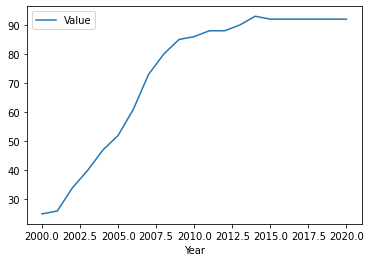

In [17]:
gm_corn_general.plot(x='Year', y='Value')

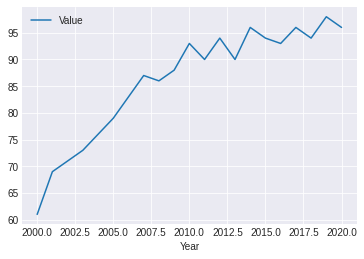

In [85]:
gm_cotton_general.plot(x='Year', y='Value')

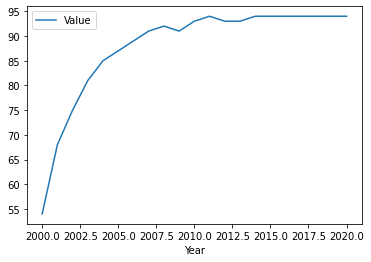

In [68]:
gm_soy_general.plot(x='Year', y='Value')

In [70]:
gm_corn_general.describe()

,Year,Value
count,21.000000,21.000000
mean,2010.000000,72.380952
std,6.204837,24.538696
min,2000.000000,25.000000
25%,2005.000000,52.000000
50%,2010.000000,86.000000
75%,2015.000000,92.000000
max,2020.000000,93.000000


In [72]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')



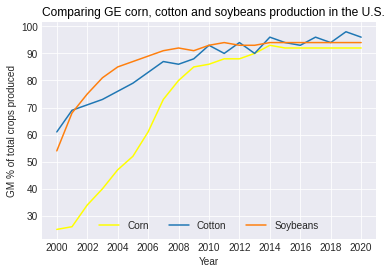

In [106]:
ax = gm_corn_general.plot(x='Year', y = 'Value', kind = 'line', color = 'yellow', label='Corn')
gm_cotton_general.plot(x='Year', y = 'Value', kind = 'line', label='Cotton', ax=ax)
gm_soy_general.plot(x='Year', y = 'Value', kind = 'line', label='Soybeans', ax=ax)

plt.legend(loc=8, ncol=8)
plt.title("Comparing GE corn, cotton and soybeans production in the U.S.", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("GM % of total crops produced")
plt.xticks(np.arange(2000, 2022, 2))

plt.savefig('general_gm_crops.png')